# **1. Data collection**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import os
import numpy as np
import pandas as pd
url_original = 'https://www.findamasters.com/masters-degrees/msc-degrees/'
page = requests.get(url_original)
print(page)



<Response [200]>


#### 1.1 Get the list of master's degree courses

In [ ]:
#initialize empty list to store the names of the courses

msc_names = []

def scrape_page(url):
    retries = 0
    max_retries = 5

    while retries < max_retries:
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        if page.status_code == 200:
            links = soup.find_all(class_='courseLink text-dark')

            for link in links:
                names = link.find_all('u')

                if names:
                    for name in names:

                        msc_names.append(name.text)

                        print(name.text)

            return

        elif page.status_code == 429:

            retries += 1
            print(f" Retrying ({retries}/{max_retries})...")
            time.sleep(2 ** retries)

    else:
        print(f"Failed to retrieve the page. Status code: {page.status_code}")
        return

url_pattern = 'https://www.findamasters.com/masters-degrees/msc-degrees/?PG={}'

# Scrape data from pages 1 to 400
for page_number in range(1, 401):
    page_url = url_pattern.format(page_number)
    scrape_page(page_url)
    time.sleep(1)  # Add a delay of 0.5 seconds between requests so the website doesnt think we are DDOS-ing



3D Design for Virtual Environments - MSc
Accounting and Finance - MSc
Accounting and Finance (MSc)
Accounting, Accountability & Financial Management MSc
Accounting, Financial Management and Digital Business - MSc
Actuarial Management MSc
Actuarial Science MSc
Addictions MSc
Adult and Mental Health Nursing (pre-registration) MSc
Adult Nursing (pre-registration) MSc
Advanced Chemical Engineering - MSc
Advanced Clinical Practice MSc
Advanced Mechanical Engineering MSc
Advanced Physiotherapy Practice - MSc
Air Quality Solutions - MSc
Air Safety Management MSc
Air Transport Management MSc
Aircraft Maintenance Management MSc
Analytical Toxicology MSc
Applied Computer Science and Artificial Intelligence - MSc
Applied Economics (Banking and Financial Markets), online MSc
Applied Linguistics - MSc
Applied Mathematics MSc
Applied Neuroscience Online | MSc, PG Dip
Applied Physics MSc
Applied Statistical Modelling & Health Informatics MSc, PGCert, PGDip
Applied Statistics (online) MSc
Archaeology 

KeyboardInterrupt: 

#### 1.2 Crawl master's degree pages

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

output_file = 'master_urls.txt'

def scrape_page_for_links(url, output_file):
    retries = 0
    max_retries = 5

    while retries < max_retries:
        page = requests.get(url)

        if page.status_code == 200:
            soup = BeautifulSoup(page.content, 'html.parser')
            link_elements = soup.find_all('a', class_='courseLink text-dark', href=True)

            # Extract the 'href' attribute value for each link
            page_urls = ['https://www.findamasters.com' + link_element['href'] for link_element in link_elements]

            # Return the list of URLs
            return page_urls

        elif page.status_code == 429:
            #multiple retries
            retries += 1
            print(f"Rate limited. Retrying ({retries}/{max_retries})...")
            time.sleep(2 ** retries)

    else:
        print(f"Failed to retrieve the page. Status code: {page.status_code}")
        return []

# URL pattern with a placeholder for page number
url_pattern = 'https://www.findamasters.com/masters-degrees/msc-degrees/?PG={}'

# Open the file in append mode
with open(output_file, 'a') as file:
    for page_number in range(1, 401):
        page_url = url_pattern.format(page_number)
        page_urls = scrape_page_for_links(page_url, output_file)

        # Print each URL immediately after storing it and write to the file
        for line_number, url in enumerate(page_urls, 1):
            print(f"Line {line_number}: {url}")
            file.write(url)

        time.sleep(0.75)  # delay between requests



Line 1: https://www.findamasters.com/masters-degrees/course/3d-design-for-virtual-environments-msc/?i93d2645c19223
Line 2: https://www.findamasters.com/masters-degrees/course/accounting-and-finance-msc/?i321d3232c3891
Line 3: https://www.findamasters.com/masters-degrees/course/accounting-and-finance-msc/?i280d4409c4025
Line 4: https://www.findamasters.com/masters-degrees/course/accounting-accountability-and-financial-management-msc/?i132d7816c25522
Line 5: https://www.findamasters.com/masters-degrees/course/accounting-financial-management-and-digital-business-msc/?i345d4286c351
Line 6: https://www.findamasters.com/masters-degrees/course/actuarial-management-msc/?i393d8527c62946
Line 7: https://www.findamasters.com/masters-degrees/course/actuarial-science-msc/?i393d8527c62945
Line 8: https://www.findamasters.com/masters-degrees/course/addictions-msc/?i132d4318c27100
Line 9: https://www.findamasters.com/masters-degrees/course/adult-and-mental-health-nursing-pre-registration-msc/?i393d890

KeyboardInterrupt: 

In [ ]:

directory = r'C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS'
input_file = 'master_urls.txt'
os.makedirs(directory, exist_ok=True)

with open(input_file, 'r') as file:
    urls = file.read().split('https://')

urls = [url.strip() for url in urls if url.strip()]
retries = 0
max_retries = 10
files_per_folder = 15
for folder_index, start in enumerate(range(0,len(urls),files_per_folder), start = 1):
    folder_path = os.path.join(directory, f'html_page{folder_index}')
    os.makedirs(folder_path, exist_ok=True)

    url_subset = urls[start:start + files_per_folder]
    for file_index, url in enumerate(url_subset, start=1):
        #addin back the https in order to make the remaining operations
        full_url = f'https://{url}'

        for attempt in range(max_retries):
            content = requests.get(full_url)
            if content.status_code == 200:
                html_content = content.text
                file_name = f'html_text_masters{file_index}.html'
                file_path = os.path.join(folder_path, file_name)

                with open(file_path, 'w', encoding='utf-8') as file:
                    file.write(html_content)

                print(f"Saved HTML content of {full_url} to {file_path}")

                break
            else:
                print(f"Failed to retrieve HTML content from {full_url}. Retrying... (Attempt {attempt + 1})")
                time.sleep(1.75 **(attempt + 1))

    time.sleep(1.75)



Saved HTML content of https://www.findamasters.com/masters-degrees/course/3d-design-for-virtual-environments-msc/?i93d2645c19223 to C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS\html_page1\html_text_masters1.html
Saved HTML content of https://www.findamasters.com/masters-degrees/course/accounting-and-finance-msc/?i321d3232c3891 to C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS\html_page1\html_text_masters2.html
Saved HTML content of https://www.findamasters.com/masters-degrees/course/accounting-accountability-and-financial-management-msc/?i132d7816c25522 to C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS\html_page1\html_text_masters3.html
Saved HTML content of https://www.findamasters.com/masters-degrees/course/accounting-financial-management-and-digital-business-msc/?i345d4286c351 to C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS\html_page1\html_text_masters4.html
Saved HTML content of https://www.findamasters.com/masters-degrees/course/addictions-msc/?i132d4318c27100 to C

#### 1.3 Parse downloaded pages

In [ ]:


# Function to extract information from the HTML files
def extract_data(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    course_name_element = soup.find('h1', class_='text-white course-header__course-title')
    university_name_element = soup.find('a', class_='course-header__institution text-white font-weight-light d-block d-md-inline')
    faculty_name_element = soup.find('a', class_='course-header__department')
    description_element = soup.find('div', id='Snippet')
    fees_element = soup.find('div', class_="course-sections course-sections__fees tight col-xs-24")
    start_date = soup.find('span', class_='key-info__start-date')
    is_full_time = soup.find('span', class_ = 'key-info__study-type')
    modal_element = soup.find('span', class_='key-info__qualification')
    duration_element = soup.find('span', class_='key-info__content key-info__duration py-2 pr-md-3 d-block d-md-inline-block')
    city_element = soup.find('a', class_='card-badge text-wrap text-left badge badge-gray-200 p-2 m-1 font-weight-light course-data course-data__city')
    country_element = soup.find('a', class_='card-badge text-wrap text-left badge badge-gray-200 p-2 m-1 font-weight-light course-data course-data__country')
    online_badge = soup.find('a', class_='course-data__online')
    on_campus_badge = soup.find('a', class_='course-data__on-campus')
    canonical_link_element = soup.find('link', {'rel': 'canonical'})

    # Extract text content from elements
    course_name = course_name_element.text.strip() if course_name_element else 'None'
    university_name = university_name_element.text.strip() if university_name_element else 'None'
    faculty_name = faculty_name_element.text.strip() if faculty_name_element else 'None'
    description = description_element.text.strip() if description_element else 'None'
    fees = fees_element.text.strip() if fees_element else 'No Information'
    modality = modal_element.text.strip() if modal_element else 'None'
    duration = duration_element.text.strip() if duration_element else 'None'
    city = city_element.text.strip() if city_element else 'None'
    country = country_element.text.strip() if country_element else 'None'
    online_badge_text = online_badge.text.strip() if online_badge else 'None'
    on_campus_badge_text = on_campus_badge.text.strip() if on_campus_badge else 'None'
    start_date_text = start_date.text.strip() if start_date else 'None'
    is_full_time_text = is_full_time.text.strip() if is_full_time else 'None'
    link = canonical_link_element['href'] if canonical_link_element else 'None'
    # Access 'href' attribute for the link

    return course_name, university_name, faculty_name, description, fees, modality, duration, city, country, online_badge_text, on_campus_badge_text,start_date_text, is_full_time_text,  link

# Main processing loop
output_directory = r'C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS'
directory = r'C:\Users\ahmad\Desktop\sap\adm\HW3\TEXT DOCUMENTS'
sorted_folders = sorted(os.listdir(directory), key=lambda folder: int(folder.split('html_page')[1]))

# Counter for naming TSV files
count = 0

df_list = []

for folder_name in sorted_folders:
    folder_path = os.path.join(directory, folder_name)

    for file_index in range(1, 16):
        file_name = f'html_text_masters{file_index}.html'
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, 'r', encoding='utf-8') as html_file:
            html_content = html_file.read()

            # Extract data from HTML content
            course_name, university_name, faculty_name, description, fees, modality, duration, city, country, online_badge_text, on_campus_badge_text,  start_date_text, is_full_time_text, link = extract_data(html_content)

            data_dict = {
                'Course Name': course_name,
                'University Name': university_name,
                'Faculty Name': faculty_name,
                'Description': description,
                'Fees': fees,
                'Modality': modality,
                'Duration': duration,
                'City': city,
                'Country': country,
                'Online Badge': online_badge_text,
                'On Campus Badge': on_campus_badge_text,
                'Start Date': start_date_text,
                'isfulltime': is_full_time_text,
                'Link': link
            }

            # Append the dictionary to the list
            df_list.append(data_dict)
            count += 1
            print(count)

# Concatenate the list of dataframes into a single dataframe
df = pd.concat([pd.DataFrame([data_dict]) for data_dict in df_list], ignore_index=True)

print(df)
print(df.head())
print(df.describe())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# removing the \n that is appearing in front of the fees and in full time
#copying the dataframe for safer use
df_dupl = df.copy()
df_dupl['Fees'] = df_dupl['Fees'].str.replace(r'^Fees\n\n', '')
df_dupl['isfulltime'] = df_dupl['isfulltime'].replace(r'\n', '', regex=True)
df_dupl


C:\Users\ahmad\AppData\Local\Temp\ipykernel_11972\3110116428.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dupl['Fees'] = df_dupl['Fees'].str.replace(r'^Fees\n\n', '')


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Online Badge,On Campus Badge,Start Date,isfulltime,Link
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,None,On Campus,September,Full time,https://www.findamasters.com/masters-degrees/c...
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,None,On Campus,September,Full time,https://www.findamasters.com/masters-degrees/c...
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,None,On Campus,September,Full time,https://www.findamasters.com/masters-degrees/c...
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,None,On Campus,September,Full time,https://www.findamasters.com/masters-degrees/c...
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,None,On Campus,September,Full time& Part time,https://www.findamasters.com/masters-degrees/c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,None,On Campus,October,Full time,https://www.findamasters.com/masters-degrees/c...
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,None,On Campus,September,Full time& Part time,https://www.findamasters.com/masters-degrees/c...
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,None,On Campus,"October, January",Full time& Part time,https://www.findamasters.com/masters-degrees/c...
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,None,On Campus,September,Full time,https://www.findamasters.com/masters-degrees/c...


In [ ]:
# since we have an online badge and an on campus badge, and we need 1 administration for both,
#this cell merges everything into the administration column

df_dupl['administration'] = 'Unknown'  # Default value

# Apply conditions
df_dupl.loc[(df['Online Badge'] == 'None') & (df_dupl['On Campus Badge'] == 'On Campus'), 'administration'] = 'On Campus'
df_dupl.loc[(df['Online Badge'] == 'Online') & (df_dupl['On Campus Badge'] == 'On Campus'), 'administration'] = 'Online and On Campus'
df_dupl.loc[(df['Online Badge'] == 'Online') & (df_dupl['On Campus Badge'] == 'None'), 'administration'] = 'Online'
df_dupl = df_dupl.drop(['Online Badge', 'On Campus Badge'], axis=1)

df_dupl

,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Start Date,isfulltime,Link,administration
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,September,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,September,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,September,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,September,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,September,Full time& Part time,https://www.findamasters.com/masters-degrees/c...,On Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,October,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,September,Full time& Part time,https://www.findamasters.com/masters-degrees/c...,On Campus
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,"October, January",Full time& Part time,https://www.findamasters.com/masters-degrees/c...,On Campus
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,September,Full time,https://www.findamasters.com/masters-degrees/c...,On Campus


In [ ]:
#creation of tsv files
tsv_directory = r'C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS'

# Create the directory if it doesn't exist
if not os.path.exists(tsv_directory):
    os.makedirs(tsv_directory)

# Save each row to a separate TSV file in the specified directory
for index, row in df_dupl.iterrows():
    tsv_file_name = os.path.join(tsv_directory, f'course{index}_tsv_file.tsv')

    # replace newline characters with a space and then join the elements with a tab
    row_str = '\t'.join(map(lambda x: str(x).replace('\n', ' '), row)) + '\n'

    # Write the row to the TSV file with 'utf-8-sig' encoding
    with open(tsv_file_name, 'w', encoding='utf-8-sig') as f:
        f.write(row_str)

    print(f'TSV file completed for row {index} at: {tsv_file_name}')


TSV file completed for row 0 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course0_tsv_file.tsv
TSV file completed for row 1 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course1_tsv_file.tsv
TSV file completed for row 2 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course2_tsv_file.tsv
TSV file completed for row 3 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course3_tsv_file.tsv
TSV file completed for row 4 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course4_tsv_file.tsv
TSV file completed for row 5 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course5_tsv_file.tsv
TSV file completed for row 6 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course6_tsv_file.tsv
TSV file completed for row 7 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course7_tsv_file.tsv
TSV file completed for row 8 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV DOCUMENTS\course8_tsv_file.tsv
TSV file completed for row 9 at: C:\Users\ahmad\Desktop\sap\adm\HW3\TSV D

In [ ]:
#creating the csv file from the pandas dataframe
csv_file_path = r'C:\Users\ahmad\Desktop\sap\adm\HW3\your_file.csv'
# Save the DataFrame to a CSV file
df_dupl.to_csv(csv_file_path, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# minimal packages to import
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import *
import string
import re
from tqdm import tqdm
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from nltk.tokenize import word_tokenize
import regex as re
import requests
import heapq



# setting the filepath for the dataset, depending on where you saved them
scraping_courses = "/content/drive/MyDrive/MyDatasetFolder/your_file.csv"


In [ ]:
# Load the dataframe
df_courses = pd.read_csv(scraping_courses)


# 2. Search Engine

## **2.0 Preprocessing**

2.0.0) Preprocessing the text

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SnowballStemmer
snowstem = SnowballStemmer('english')

# Load stopwords to filter
lst_stopwords = set(stopwords.words('english'))

# Define the function to preprocess text
def preprocess_text(text):
    # Convert to lowercase this is because for some reason it wasn't elimination from stopword the word 'the' when starting with an uppercase
    text_lower = text.lower()

    # Tokenize, stem words, remove punctuation and remove stopwords
    stemmed_words = [snowstem.stem(word) for word in nltk.word_tokenize(text_lower) if not word in lst_stopwords and word.isalnum()]

    return stemmed_words

# Create column named 'descr_clean' and then apply preprocess_text to the 'Description' column in df_courses
df_courses['descr_clean'] = df_courses['Description'].apply(preprocess_text)

df_courses

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[3d, visualis, anim, play, role, mani, area, p..."
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,..."
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[account, account, financi, manag, msc, cours,..."
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[embark, profession, account, career, academ, ..."
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[join, us, onlin, session, prospect, student, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina..."
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, provid, deep, understand,..."
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[swansea, one, uk, lead, centr, materi, teach,..."
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, industri, cours, open, in..."


**2.0.1) Preprocessing the fees column**

To do this we used the exchangerate-api.com provider. (https://www.exchangerate-api.com/)


In [ ]:
# Get a dictionary with exchange rates where GBP is the base currency you want to use
# I saved the API key in another text file. There is no need to do it in this case but I thought it could be good practice

# Read API key from the file
with open('/content/drive/MyDrive/MyDatasetFolder/api_key_exchangerates', 'r') as api_key_file:
    api_key = api_key_file.read().strip()

# URL with the API key
url = f'https://v6.exchangerate-api.com/v6/{api_key}/latest/GBP'

# Making our request for the conversion rates
response = requests.get(url)
data_exchange = response.json()

with open('data_exchange.json', 'w') as json_file:
    json.dump(data_exchange, json_file)

# Read the JSON data from the file
with open('data_exchange.json', 'r') as json_file:
    loaded_data = json.load(json_file)

# Convert the 'result' column to a Pandas DataFrame
df = pd.DataFrame(loaded_data)

# Extract only the 'conversion_rates' column
conversion_rates = df['conversion_rates']


In [ ]:
# Defined a function to select the maximum fee from a list of fees
def max_value_fee(list_fees):
    filtered_fee_list = [int(fee) for fee in list_fees]
    if filtered_fee_list:
        max_fee = max(filtered_fee_list)
        max_fee = float(max_fee)
    else:
        # If the list is empty, set max_fee to None
        max_fee = None
    return max_fee

# Define a function to remove dots and commas from numbers in a string
def remove_dots_from_numbers(input_string):
    # Use regular expression to find numbers with dots or commas and remove the dots or commas
    result_string = re.sub(r'(\d)[.,](\d{3})', r'\1\2', input_string)
    return result_string

# Iterate over each row in df_courses
for index, row in df_courses.iterrows():
    # Extract the 'Fees' column as a string
    fees_string = str(row['Fees'])

    # Remove dots from numbers and specific year strings (These years tend to create problems)
    fees_string = remove_dots_from_numbers(fees_string)
    fees_string = fees_string.replace("2022", '').replace("2023", '').replace("2024", '')

    # Remove various punctuation, spaces, and special characters
    fees_string = fees_string.replace(".00 ", '').replace(".00€ ", '').replace(",00 ", '').replace(",00€ ", '').replace(".0 ", '').replace(",0 ", '').replace('.', '').replace(',', '').replace("'", '').replace(" ", '')

    # Use regular expression to find currency symbols or codes ISO 4217 for all currencies (Those are the once that are used in our conversion_rates variable)
    matches_cur = re.findall(r'HKD(?:s)?|HK(?:s)?|\p{Sc}|euro(?:s)?|dollar(?:s)?|pound(?:s)?|EUR(?:s)?|USD(?:s)?|CHF(?:s)?|SEK(?:s)?|ISK(?:s)?|RMB(?:s)?|QR(?:s)?|GBP(?:s)?|QAR(?:s)?|JPY(?:s)?', fees_string, flags=re.IGNORECASE)

    # Use regular expression to find fees (excluding specific years) in the cleaned string
    matches_fee = re.findall(r'(?!2021|2022|2023|2024)\d{4,}', fees_string)

    # Call the max_value_fee function to get the maximum fee
    fees_float = max_value_fee(matches_fee)

    # Check if currency matches and assign the corresponding ISO 4217 code for all currencies (Those are the once that are used in our conversion_rates variable)
    if matches_cur:
        currency = None
        if matches_cur[0] == 'euro' or matches_cur[0] == 'euros' or matches_cur[0] == '€' or matches_cur[0] == 'EURs' or matches_cur[0] == 'Eur' or matches_cur[0] == 'Euros' or matches_cur[0] == 'EUROS' or matches_cur[0] == 'eurs'or matches_cur[0] == 'Euro':
            currency = 'EUR'
        elif matches_cur[0] == 'dollar' or matches_cur[0] == 'dollars' or matches_cur[0] == '$':
            currency = 'USD'
        elif matches_cur[0] == 'pound' or matches_cur[0] == 'pounds' or matches_cur[0] == '£':
            currency = 'GBP'
        elif matches_cur[0] == 'RMB':
            currency = 'CNY'
        elif matches_cur[0] == 'QR':
            currency = 'QAR'
        elif matches_cur[0] == 'HK':
            currency = 'HKD'
        else:
            currency = matches_cur[0]
    else:
        currency = None

    # Initialize fees_pound as None
    fees_pound = None

    # Check if fees_float is not None and less than 100000 before rounding and conversion (fees (£) above 100000 are due to super specific errors, less than 10 which are more reasonable to deal in this way)
    if fees_float is not None and fees_float < 100000:
        fees_pound = round(fees_float / conversion_rates.get(currency, 1.0), 2)

    # Assign the calculated fees in pounds to the 'fees (£)' column
    df_courses.at[index, 'fees (£)'] = fees_pound

# Filter the df_cources to include only rows where 'fees (£)' is not null
filtered_df = df_courses[(df_courses['fees (£)'].notnull())]
filtered_df


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean,fees (£)
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,...",34750.00
5,Advanced Chemical Engineering - MSc,University of Leeds,School of Chemical and Process Engineering,The Advanced Chemical Engineering MSc at Leeds...,"UK: £13,750 (Total) International: £31,000 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[advanc, chemic, engin, msc, leed, build, core...",31000.00
7,Agricultural Sciences - MSc (Agriculture and F...,University of Helsinki,International Masters Degree Programmes,Goal of the pro­grammeWould you like to be inv...,Tuition fee per year (non-EU/EEA students): 15...,MSc,2 years,Helsinki,Finland,https://www.findamasters.com/masters-degrees/c...,On Campus,"[goal, like, involv, find, solut, futur, chall...",13026.49
8,"Agricultural, Environmental and Resource Econo...",University of Helsinki,International Masters Degree Programmes,Goal of the pro­grammeAre you looking forward ...,Tuition fee per year (non-EU/EEA students): 15...,MSc,2 years,Helsinki,Finland,https://www.findamasters.com/masters-degrees/c...,On Campus,"[goal, look, forward, futur, expert, agricultu...",13026.49
9,Air Quality Solutions - MSc,University of Leeds,Institute for Transport Studies,Up to 7 million people are estimated to die ev...,"UK: £12,500 (Total) International: £28,750 (To...",MSc,"1 year full time, 2 or 3 years part-time",Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[7, million, peopl, estim, die, everi, year, d...",28750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,Master's of Financial Technology (Fintech),Harbour.Space University,Masters Programmes,Harbour.Space's FinTech Master programme is de...,"€29,900/year","MBA, MSc",1 Year,Barcelona,Spain,https://www.findamasters.com/masters-degrees/c...,On Campus,"[fintech, master, programm, design, prepar, gr...",25966.13
5984,Master's of Front-end Development,Harbour.Space University,Masters Programmes,Front-end Development at Harbour.Space Univers...,"€29,900/year",MSc,1 year,Barcelona,Spain,https://www.findamasters.com/masters-degrees/c...,On Campus,"[develop, univers, provid, uniqu, environ, stu...",25966.13
5992,Materials and Molecular Modelling MSc,University College London,Department of Chemistry,Register your interest in graduate study at UC...,"Full time - £14,100",MSc,1 year full time,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[regist, interest, graduat, studi, uclther, gr...",14100.00
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina...",2344.77


## **2.1. Conjunctive query**


2.1.1) Create your index!


In [ ]:
############################################### DON'T RUN #######################################################
# Create Vocabulary first

# Create list of all words
words = set()
df_courses.descr_clean.apply(lambda row: [words.add(word) for word in row])

# Assign term_id to each word by creating an index
vocabulary = {}
unique_id = 1
for word in list(words):
  vocabulary[unique_id] = word
  unique_id += 1

# Save this file into a pickle file which I can later on retrieve
with open('/content/drive/MyDrive/MyDatasetFolder/vocabulary.pkl', 'wb') as pickle_file:
    pickle.dump(vocabulary, pickle_file)


In [ ]:
############################################### DON'T RUN #######################################################
# Create Inverted Index

with open('/content/drive/MyDrive/MyDatasetFolder/vocabulary.pkl', 'rb') as pickle_file:
    vocabulary = pickle.load(pickle_file)

inverted_index = dict()
overall_progress = tqdm(total=len(list(vocabulary.keys())), desc="Building Vocabulary")

# Loop through the keys of the vocabulary
for i in list(vocabulary.keys()):
    inverted_index[i] = []
    for index, row in df_courses.iterrows():
        if vocabulary[i] in row['descr_clean']:
            inverted_index[i].append(index)

    overall_progress.update(1)  # Update the overall progress

overall_progress.close()

with open('/content/drive/MyDrive/MyDatasetFolder/inverted_indexl.pkl', 'wb') as file:
        pickle.dump(inverted_index, file)


2.1.2) Execute the query


In [ ]:
# This allows to retrieve the term_id from a word
def find_key_by_value(vocabulary, value):
  for key, val in vocabulary.items():
    if val == value:
      return key
  return None


def matching_documents_finder(query):
  # Load inverted index and vocabulary
  with open('/content/drive/MyDrive/MyDatasetFolder/inverted_index.pkl', 'rb') as pickle_file:
      inverted_index = pickle.load(pickle_file)

  with open('/content/drive/MyDrive/MyDatasetFolder/vocabulary.pkl', 'rb') as vocab_file:
      vocabulary = pickle.load(vocab_file)

  # Preprocess the query in order to compare it with desc_clean
  # Tokenize and preprocess the query
  query = ''.join(char for char in query if char.isalnum() or char.isspace())
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(query)
  query = ' '.join([word for word in words if word.lower() not in stop_words])

  # Stemming using SnowballStemmer
  snowstem = SnowballStemmer('english')
  query_words = [snowstem.stem(word) for word in query.lower().split()]

  # Initialize a list to store matching documents
  matching_documents = []

  # Find documents that contain all the words in the query
  for stemmed_word in query_words:
      if stemmed_word in vocabulary.values():
        term_id = find_key_by_value(vocabulary, stemmed_word)
        matching_documents.append(set(inverted_index[term_id])) # If found in vocabulary it appends the the list of documents to matching_documents. I used a set to then use the intersection function.

  return matching_documents


def common_documents_finder(query):
  matching_documents = matching_documents_finder(query)
  if matching_documents:
      common_documents = set.intersection(*matching_documents) # Using set intersection I can find the common_documents (documents that contain all of the words)

  return common_documents


def search_engine_with_vocabulary(query):
  common_documents = common_documents_finder(query)
  df_result = df_courses.loc[list(common_documents), ['Course Name', 'University Name', 'Description', 'Link']].copy()

  # Display the DataFrame
  return df_result

# Example usage
search_engine_with_vocabulary(input())


Fashion, AND MArketing!!


,Course Name,University Name,Description,Link
5122,Luxury Buying & Logistics - MSc,University for the Creative Arts,The business of moving and shipping luxury ite...,https://www.findamasters.com/masters-degrees/c...
3587,Fashion Forecasting & Data Analysis - MA/MSc,University for the Creative Arts,UCA's new MSc degree in Fashion Forecasting an...,https://www.findamasters.com/masters-degrees/c...
3588,Fashion Marketing Management - MSc/PgD/PgC,Cardiff Metropolitan University,The MSc Fashion Marketing Management degree at...,https://www.findamasters.com/masters-degrees/c...
4776,International Fashion Marketing - MSc,Glasgow Caledonian University,The global fashion industry is valued at over ...,https://www.findamasters.com/masters-degrees/c...
4777,International Fashion Marketing - MSc,Heriot-Watt University,MSc International Fashion Marketing (IFM) at H...,https://www.findamasters.com/masters-degrees/c...
4778,International Fashion Marketing MSc,Coventry University London,"Are you looking to move into fashion, accelera...",https://www.findamasters.com/masters-degrees/c...
4779,International Fashion Marketing MSc,York St John University,Combine fashion industry expertise with transf...,https://www.findamasters.com/masters-degrees/c...
140,Global Marketing & Communications - MA/MSc,University for the Creative Arts,"Refine your existing skills in marketing, comm...",https://www.findamasters.com/masters-degrees/c...
204,Master Programme in Fashion Marketing and Mana...,University of Boras,Fashion is one of the most complex and fascina...,https://www.findamasters.com/masters-degrees/c...
112,Fashion Business & Management - MA/MSc,University for the Creative Arts,If you are seeking a high-level career in mana...,https://www.findamasters.com/masters-degrees/c...


## **2.2) Conjunctive query & Ranking score**

2.2.1) Inverted index


In [ ]:
# Build tfidf_data
tfidf = TfidfVectorizer(input='content', lowercase=False, tokenizer=lambda text: text)
results = tfidf.fit_transform(df_courses.descr_clean)
result_dense = results.todense()
tfidf_data = pd.DataFrame(result_dense.tolist(), index=df_courses.index, columns=tfidf.get_feature_names_out()) # Used to create the New Inverted Index


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
############################################### DON'T RUN #######################################################
# 2.2.1 New Inverted index

inverted_index_2 = dict()
overall_progress = tqdm(total=len(list(inverted_index.keys())), desc="Building Inverted Index 2")

for term_id in list(inverted_index.keys()):
  values = tfidf_data.loc[tfidf_data[vocabulary[term_id]] > 0, [vocabulary[term_id]]] # Find values for which tfidf are > 0
  term = vocabulary[term_id] # Find the term
  values_list = list(zip(values.index, values[term]))
  inverted_index_2[term_id] = values_list
  overall_progress.update(1)  # Update the overall progress

overall_progress.close()

print(inverted_index_2)

# Save pickle file
with open('/content/drive/MyDrive/MyDatasetFolder/inverted_index_2.pkl', 'wb') as file:
        pickle.dump(inverted_index_2, file)

print(f"Vocabulary saved to /content/drive/MyDrive/MyDatasetFolder/inverted_index_2.pkl")


Building Inverted Index 2: 100%|██████████| 8753/8753 [00:35<00:00, 245.76it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2.2.2) Execute the query

In [ ]:
# This allows retrieving the term_id from a word
def find_key_by_value(vocabulary, value):
    for key, val in vocabulary.items():
        if val == value:
            return key
    return None

def search_engine_similarity():
    # Input query
    query = input()

    # Load inverted indexes and vocabulary from pickled files
    with open('/content/drive/MyDrive/MyDatasetFolder/inverted_index.pkl', 'rb') as pickle_file:
        inverted_index = pickle.load(pickle_file)

    with open('/content/drive/MyDrive/MyDatasetFolder/inverted_index_2.pkl', 'rb') as pickle_file:
        inverted_index_2 = pickle.load(pickle_file)

    with open('/content/drive/MyDrive/MyDatasetFolder/vocabulary.pkl', 'rb') as vocab_file:
        vocabulary = pickle.load(vocab_file)

    # Tokenize and preprocess the input query
    query = ''.join(char for char in query if char.isalnum() or char.isspace())
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(query)
    query = ' '.join([word for word in words if word.lower() not in stop_words])

    # Stem the query to its root form using SnowballStemmer
    snowstem = SnowballStemmer('english')
    query_text = ' '.join(snowstem.stem(word) for word in query.lower().split())
    query_words = [snowstem.stem(word) for word in query.lower().split()]

    # Initialize a list to store matching documents
    matching_documents = []

    # Find documents that contain all the stemmed words in the query
    for stemmed_word in query_words:
        if stemmed_word in vocabulary.values():
            # Retrieve the term_id from the vocabulary
            term_id = find_key_by_value(vocabulary, stemmed_word)
            matching_documents.append(set(inverted_index[term_id]))

    # Check if there are any matching documents
    if matching_documents:
        # Find the common set of documents among the matching sets
        common_documents = set.intersection(*matching_documents)

    # Extract relevant information from the df_courses for the matching documents and create a filtered_df
    filtered_df = df_courses.iloc[list(common_documents)]
    documents_text = [' '.join(words) for words in filtered_df['descr_clean']]

    # Create a list of texts including the stemmed query and the descr_clean of matching documents
    all_texts = [query_text] + documents_text

    # Use TF-IDF vectorization to convert the texts into a matrix
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Calculate cosine similarities between the query and each document
    cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:]).flatten()

    # Create a min heap to store the top-k documents
    heap = []

    for i, document in enumerate(common_documents):
        # Push the document details along with the cosine similarity to the heap
        heapq.heappush(heap, (cosine_similarities[i], df_courses.loc[document, 'Course Name'], df_courses.loc[document, 'University Name'], df_courses.loc[document, 'Description'], df_courses.loc[document, 'Link']))

        # If the heap size exceeds k, pop the smallest element
        if len(heap) > 5:
            heapq.heappop(heap)

    # Convert the heap to a DataFrame
    heap_df = pd.DataFrame(heap, columns=['Cosine Similarity', 'Course Name', 'University Name', 'Description', 'Link'])

    # Sort the DataFrame based on the 'Cosine Similarity' column in descending order
    heap_df = heap_df.sort_values(by='Cosine Similarity', ascending=False)

    return heap_df

search_engine_similarity()

Fashion, AND MArketing!!


,Cosine Similarity,Course Name,University Name,Description,Link
4,0.429630,Fashion Marketing Management - MSc/PgD/PgC,Cardiff Metropolitan University,The MSc Fashion Marketing Management degree at...,https://www.findamasters.com/masters-degrees/c...
3,0.297942,International Fashion Marketing - MSc,Glasgow Caledonian University,The global fashion industry is valued at over ...,https://www.findamasters.com/masters-degrees/c...
2,0.276519,Master Programme in Fashion Marketing and Mana...,University of Boras,Fashion is one of the most complex and fascina...,https://www.findamasters.com/masters-degrees/c...
1,0.245160,International Fashion Marketing MSc,Coventry University London,"Are you looking to move into fashion, accelera...",https://www.findamasters.com/masters-degrees/c...
0,0.222708,International Fashion Marketing MSc,York St John University,Combine fashion industry expertise with transf...,https://www.findamasters.com/masters-degrees/c...


# **3. Define a new score!**

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SnowballStemmer
snowstem = SnowballStemmer('english')

# Load stopwords to filter
lst_stopwords = set(stopwords.words('english'))

# Create column named 'descr_clean' and then apply preprocess_text to the 'Description' column in df_courses
df_courses['title_clean'] = df_courses['Course Name'].apply(preprocess_text)

df_courses

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean,fees (£),title_clean
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[3d, visualis, anim, play, role, mani, area, p...",NaN,"[3d, design, virtual, environ, msc]"
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,...",34750.00,"[account, financ, msc]"
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[account, account, financi, manag, msc, cours,...",NaN,"[account, account, financi, manag, msc]"
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[embark, profession, account, career, academ, ...",NaN,"[account, financi, manag, digit, busi, msc]"
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[join, us, onlin, session, prospect, student, ...",NaN,"[addict, msc]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina...",2344.77,"[materi, engin]"
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, provid, deep, understand,...",NaN,"[materi, engin, msc]"
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[swansea, one, uk, lead, centr, materi, teach,...",NaN,"[materi, engin, msc, research]"
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, industri, cours, open, in...",NaN,"[materi, engin, industri, msc]"


In [ ]:
# Define the country_score dictionary
country_score = {
    'United Kingdom': 4,
    'USA': 4,
    'Finland': 3,
    'Netherlands': 3,
    'Germany': 3,
    'Iceland': 2,
    'Ireland': 2,
    'Portugal': 2,
    'France': 3,
    'Belgium': 2,
    'Canada': 3,
    'Hong Kong': 2,
    'Sweden': 2,
    'China': 2,
    'Estonia': 1,
    'Italy': 3,
    'New Zealand': 1,
    'Lithuania': 1,
    'Austria': 1,
    'Saudi Arabia': 1,
    'Hungary': 1,
    'Greece': 3,
    'Denmark': 1,
    'Croatia': 1,
    'Turkey': 2,
    'Romania': 1,
    'Spain': 2,
    'Japan': 3,
    'Czechia': 1,
    'Switzerland': 3,
    'Singapore': 2,
    'Australia': 3,
    'Qatar': 1,
    'Cyprus': 2,
    'Israel': 2,
    'Gibraltar': 1,
    'Luxembourg': 2,
    'India': 2,
    'Malaysia': 1,
    'Chile': 1,
    'Kazakhstan': 1,
    'United Arab Emirates': 1,
    'Jamaica': 1,
    'Norway': 1,
}


In [ ]:
def new_score(query):
  common_documents = list(common_documents_finder(query))
  df_result = df_courses.loc[common_documents, [
            'Course Name', 'University Name', 'Description', 'Fees', 'Modality', 'Duration', 'City', 'Country', 'descr_clean', 'fees (£)', 'title_clean']].copy()

  query = ''.join(char for char in query if char.isalnum() or char.isspace())
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(query)
  query = ' '.join([word for word in words if word.lower() not in stop_words])

  # Stemming using SnowballStemmer
  snowstem = SnowballStemmer('english')
  query_words = [snowstem.stem(word) for word in query.lower().split()]


  # Find documents that contain all the words in the query

  for i in range(len(common_documents)):
      count = 0  # Initialize count for each document
      for stemmed_word in query_words:
          if stemmed_word in df_result['title_clean'].iloc[i]:
              count += 1
      df_result.at[df_result.index[i], 'title_score'] = count  # Update count for the current document

  for i in range(len(common_documents)):
      count = 0  # Initialize count for each document

      # Check if the country is in the country_score dictionary
      country = df_result['Country'].iloc[i]
      if country in country_score:
          count += country_score[country]

      df_result.at[df_result.index[i], 'location_score'] = count

  # Create a new column 'duration_numeric' to store the extracted numerical values
  df_result['duration_numeric'] = df_result['Duration'].str.extract('(\d+)')

  # Convert the 'duration_numeric' column to a list
  duration_list = df_result['duration_numeric'].tolist()

  # Define a dictionary for duration scores
  duration_score_dict = {'1': 1, '12': 1, '2': 2, '24': 2}  # Add more conditions as needed

  # Create a new column 'duration_score' based on the dictionary
  df_result['duration_score'] = df_result['duration_numeric'].map(duration_score_dict)
  return df_result


def calculate_final_score(title_score, location_score, duration_score, title_weight=1, location_weight=1, duration_weight=1):
    # Adjust the weights based on your preference
    weighted_title_score = title_score * title_weight
    weighted_location_score = location_score * location_weight
    weighted_duration_score = duration_score * duration_weight

    # Calculate the final score as the sum of weighted scores
    final_score = weighted_title_score + weighted_location_score + weighted_duration_score

    return final_score


def rank_courses_new_score(query, k=5):
    df_result = new_score(query)

    # Define weights for each score
    w_title = 4
    w_location = 1
    w_duration = 1

    # Fill NaN values in the individual scores with zeros
    df_result[['title_score', 'location_score', 'duration_score']] = df_result[['title_score', 'location_score', 'duration_score']].fillna(0)

    # Create a min heap to store the top-k documents
    heap = []

    for _, row in df_result.iterrows():
        # Calculate the final score using the weights
        final_score = calculate_final_score(row['title_score'], row['location_score'], row['duration_score'], title_weight=w_title, location_weight=w_location, duration_weight=w_duration)

        # Push the document details along with the final score to the heap
        heapq.heappush(heap, (final_score, row['Course Name'], row['University Name'], row['Description'], row['Fees'], row['Modality'], row['Duration'], row['City'], row['Country'], row['descr_clean'], row['fees (£)'], row['title_clean'], row['duration_numeric'], row['duration_score'], final_score))

        # If the heap size exceeds k, pop the smallest element
        if len(heap) > k:
            heapq.heappop(heap)

    # Convert the heap to a DataFrame
    heap_df = pd.DataFrame(heap, columns=['final_score_heap', 'Course Name', 'University Name', 'Description', 'Fees', 'Modality', 'Duration', 'City', 'Country', 'descr_clean', 'fees (£)', 'title_clean', 'duration_numeric', 'duration_score', 'final_score'])

    # Sort the DataFrame based on the 'final_score' column in descending order
    heap_df = heap_df.sort_values(by='final_score', ascending=False)

    return heap_df



rank_courses_new_score(input())


Fashion, AND MArketing!!


,final_score_heap,Course Name,University Name,Description,Fees,Modality,Duration,City,Country,descr_clean,fees (£),title_clean,duration_numeric,duration_score,final_score
1,13.0,International Fashion Marketing - MSc,Heriot-Watt University,MSc International Fashion Marketing (IFM) at H...,Please see the university website for further ...,"MSc, PGDip","1 year full time, 2 years part time",Edinburgh,United Kingdom,"[msc, intern, fashion, market, ifm, univers, e...",NaN,"[intern, fashion, market, msc]",1,1.0,13.0
2,13.0,Fashion Marketing Management - MSc/PgD/PgC,Cardiff Metropolitan University,The MSc Fashion Marketing Management degree at...,"​As a postgraduate, research or part-time stud...","PGCert, PGDip, MSc","1 year full time, 2 years part time",Cardiff,United Kingdom,"[msc, fashion, market, manag, degre, cardiff, ...",NaN,"[fashion, market, manag]",1,1.0,13.0
3,13.0,International Fashion Marketing MSc,Coventry University London,"Are you looking to move into fashion, accelera...",UK Fees: 14250 ; 15450 (with Professional Prac...,MSc,"1 year full time, 18 months extended professio...",London,United Kingdom,"[look, move, fashion, acceler, fashion, career...",18950.0,"[intern, fashion, market, msc]",1,1.0,13.0
4,13.0,International Fashion Marketing MSc,York St John University,Combine fashion industry expertise with transf...,Please see the university website for further ...,MSc,"1 year full time, 2 years part time, 2 years f...",York,United Kingdom,"[combin, fashion, industri, expertis, transfer...",NaN,"[intern, fashion, market, msc]",1,1.0,13.0
0,12.0,Master Programme in Fashion Marketing and Mana...,University of Boras,Fashion is one of the most complex and fascina...,Please see the university website for further ...,MSc,Full-time: 2 years,Boras,Sweden,"[fashion, one, complex, fascin, area, research...",NaN,"[master, programm, fashion, market, manag]",2,2.0,12.0


In the 'Fashion and Marketing' query example we can see that both in the scores the courses returned are really enherent with the query. This is because even thoug it has a greater importance in the query it's also true that an importance of all words in the title takes also a heavy weight in the scoring process as it carries more meaning than in the description. In addition to that we can see that in the new score, more 'prestigious' universities are being shown.


# **4. Visualizing the most relevant MSc degrees**

#### Using maps can help people understand how far one university is from another so they can plan their academic careers more adequately. Here, we challenge you to show a map of the courses found with the score defined in point 3. You should be able to identify at least the city and country for each MSc degree. <br> Once you defined your visualization strategy, include a way to encode fees in your charts. The map should show (with a proper legend) different courses and associated taxation: the user wants a glimpse not only of how far he will need to move but also of how much it will cost him!

The objective is to plot on a map univeristies that host the suggested courses, along with some useful informations about them (like distance and cost).  
The *Folium* python library has been chosen to do so, because it provides a detailed map and the right amount of interactivity: the user will be able to move and zoom across the map, and also visualize the courses names along with the associated fees.

In [ ]:
# Importing all needed libraries
# Using openstreetmap geocoder
from geopy.geocoders import Nominatim # for geocoding
from geopy.distance import geodesic # for distance calculation
import geocoder # to get user ip for its location
import folium # for folium plotting
import branca.colormap as cm # for colormaps in folium
%matplotlib inline

In [ ]:
# Suggested MSCs by query
k = input() # Number of requested MSCs
qdf = rank_courses_new_score(input(), k=k)
display(qdf.head())

(1354, 4)


,Course Name,University Name,Description,Link
1,Accounting and Finance - MSc,University of Leeds,Businesses and governments rely on sound finan...,https://www.findamasters.com/masters-degrees/c...
5,Advanced Chemical Engineering - MSc,University of Leeds,The Advanced Chemical Engineering MSc at Leeds...,https://www.findamasters.com/masters-degrees/c...
7,Agricultural Sciences - MSc (Agriculture and F...,University of Helsinki,Goal of the pro­grammeWould you like to be inv...,https://www.findamasters.com/masters-degrees/c...
8,"Agricultural, Environmental and Resource Econo...",University of Helsinki,Goal of the pro­grammeAre you looking forward ...,https://www.findamasters.com/masters-degrees/c...
9,Air Quality Solutions - MSc,University of Leeds,Up to 7 million people are estimated to die ev...,https://www.findamasters.com/masters-degrees/c...


**Geocoding** universities coordinates is achieved by using *Geopy*, a library which provides simple and fast access to numerous geocoding *APIs*. Precisely, it was decided to use *Nominatim*: it's a free *API* which relies on the *OSM (OpenStreetMap)* service.  
For each query (e.g. university name) it returns a dictionary with related informations, such as the city, address, longitude, latitude, etc.  
Because it is free, there are some cons:
- It can handle only 1 request per second, making it not suitable for bulk geocoding;
- It doesn't handle typos or traductions, resulting in not geocoding the coordinates of some universities. When it is the case, the coordinates can be estimated by referring to the city (or the country) the respective university lies in.

In [ ]:
# GEOCODING

# rename fees, city and country columns
qdf.rename(columns={"fees (£)": "fees", "City": "city", "Country": "country"}, inplace=True)

# geocode university coordinates, add them to dataframe and check the output
gc = Nominatim(timeout = 1, user_agent="adm_hw3")
coords = qdf['University Name'].apply(gc.geocode, exactly_one = True)
# geocode city coordinates when the university could not be geocoded
coords.fillna(qdf['city'].apply(gc.geocode, exactly_one = True), inplace = True)
# geocode country coordinates when the city could not be geocoded
coords.fillna(qdf['country'].apply(gc.geocode, exactly_one = True), inplace = True)

# create the proper columns in the dataset
qdf['lat'] = np.array([l.latitude for l in coords])
qdf['lon'] = np.array([l.longitude for l in coords])

display(qdf.head()) # CHECK

,Course Name,University Name,Description,Link,fees,city,country,lat,lon
1,Accounting and Finance - MSc,University of Leeds,Businesses and governments rely on sound finan...,https://www.findamasters.com/masters-degrees/c...,34750.00,Leeds,United Kingdom,53.806774,-1.556288
5,Advanced Chemical Engineering - MSc,University of Leeds,The Advanced Chemical Engineering MSc at Leeds...,https://www.findamasters.com/masters-degrees/c...,31000.00,Leeds,United Kingdom,53.806774,-1.556288
7,Agricultural Sciences - MSc (Agriculture and F...,University of Helsinki,Goal of the pro­grammeWould you like to be inv...,https://www.findamasters.com/masters-degrees/c...,13068.48,Helsinki,Finland,60.175648,24.953550
8,"Agricultural, Environmental and Resource Econo...",University of Helsinki,Goal of the pro­grammeAre you looking forward ...,https://www.findamasters.com/masters-degrees/c...,13068.48,Helsinki,Finland,60.175648,24.953550
9,Air Quality Solutions - MSc,University of Leeds,Up to 7 million people are estimated to die ev...,https://www.findamasters.com/masters-degrees/c...,28750.00,Leeds,United Kingdom,53.806774,-1.556288


Some **preprocessing** must be done before plotting the map. As some of the suggested courses could be provided by the same university, it was decided to **aggregate** rows with the same university name (keeping courses names and the respective fees in lists).  
A column named **label** was added, which contains the formatted labels that will be used to show courses informations in the map. To give fees infos at a glimpse, a column named **minfee** was added, which contains the minimum annual fee among the (suggested) courses provided by the same university.  
Lastly, the user location is geocoded to calculate and store in the **dist** column the distance between him and the universities.

In [ ]:
# PLOTTING PREPROCESSING -- Folium
# Remember that more than one course per university can be returned
# so make sure that when hovering on a university all infos are printed

# Aggregate rows with the same university name, creating a list of courses for each university,
# with the associated lists including descriptions, urls and fees
aggregation_functions = {'Course Name': list, 'fees': list,
                         'Link': list, 'lat': 'first', 'lon': 'first', 'city': 'first',
                         'country': 'first'}
pdf = qdf.groupby(qdf['University Name'], as_index=False).aggregate(aggregation_functions)

# Create a 'label' column, which contains the formatted labels that will be used in the map
pdf['label'] = pdf.apply(lambda row: '<br>'.join([i + ' (' + str(j) + ' £/y)'  for i, j in zip(row['Course Name'], row['fees'])]), axis = 1)

# Create a 'minfee' column, which will be used in the map for color assignment
pdf['minfee'] = pdf['fees'].apply(np.min)

# Geocode user location, handling the case which it can't be done (default location will be Rome)
try:
    user_ip = geocoder.ip('me')
except:
    user_ip = pd.DataFrame(np.array([41.902782, 12.496366]), columns = ['latlng'])
# Create a 'dist' column, which stores the distance (km) from user
pdf['dist'] = pdf.apply(lambda row: round(geodesic([row['lat'],row['lon']],user_ip.latlng).km,3), axis = 1)

display(pdf.head()) # CHECK

,University Name,Course Name,fees,Link,lat,lon,city,country,label,minfee,dist
0,Erasmus School of Economics,"[Economics of Markets and Organisations, Econo...","[14026.83, 14026.83]",[https://www.findamasters.com/masters-degrees/...,51.924442,4.477750,Rotterdam,Netherlands,Economics of Markets and Organisations (14026....,14026.83,1270.405
1,Learna | Diploma MSc,[Care of the Older Person - MSc],[8880.0],[https://www.findamasters.com/masters-degrees/...,51.481655,-3.179193,Cardiff,United Kingdom,Care of the Older Person - MSc (8880.0 £/y),8880.00,1599.269
2,Northumbria University,"[Business and Management MSc (Online), Compute...","[9075.0, 9075.0, 9075.0]",[https://www.findamasters.com/masters-degrees/...,54.977755,-1.607282,Newcastle,United Kingdom,Business and Management MSc (Online) (9075.0 £...,9075.00,1784.036
3,University College London,[Humanitarian Policy and Practice MSc],[11800.0],[https://www.findamasters.com/masters-degrees/...,51.524203,-0.133001,London,United Kingdom,Humanitarian Policy and Practice MSc (11800.0 ...,11800.00,1438.669
4,University for the Creative Arts,"[Fashion Business & Management - MA/MSc, Globa...","[10500.0, 10500.0]",[https://www.findamasters.com/masters-degrees/...,51.216262,-0.806057,Farnham,United Kingdom,Fashion Business & Management - MA/MSc (10500....,10500.00,1450.803


As said previously, the map was plotted using a library called *Folium*. Each university which provides at least one of the suggested courses is displayed, along with:
- Its name
- Course(s) name(s)
- Course(s) fees
- Distance (as the crow flies) from the user location

The column **minfee** was used to color-code the minimun fees required for each university, going from green (least expensive at minimum) to red (most expensive at minimum).

In [ ]:
# PLOTTING -- Folium

# Create colormap based on minimum fee - WIP don't know if it has to start from 0 or from the minimum
colormap = cm.LinearColormap(colors=['green','yellow','red'], vmin=np.min(pdf['minfee']),vmax=np.max(pdf['minfee']),
                             caption='Minimum fees among the university MScs (£/y)')
colormap

# Set initial location and zoom of the map
uni_map = folium.Map(location=user_ip.latlng, zoom_start=6)
# Add user location marker
folium.Marker(location = user_ip.latlng,
              tooltip = 'Your location').add_to(uni_map)
# Add the suggested universities markers and the colormap
pdf.apply(lambda row: folium.CircleMarker(location=[row['lat'],row['lon']],
                                    color = "black",
                                    radius = 6,
                                    weight = 2,
                                    fill = True,
                                    fill_color = colormap(row['minfee']),
                                    fill_opacity = 0.8,
                                    tooltip = '<b>Institute</b>: '+ row['University Name']+'<br>' +
                                              '<b>Distance (as the crow flies)</b>: ' + str(row['dist']) + ' km'+ '<br>'+
                                              '<b>Course(s)</b>: '+ row['label']+'<br>' +
                                              '<extra></extra>').add_to(uni_map), axis = 1)
uni_map.add_child(colormap)

# Save the map onto an html file and print it inside the notebook
uni_map.save(outfile='Map - Universities hosting the Top-'+ str(k) +' suggested MScs.html')
display(uni_map)

# **BONUS: More complex search engine**

In [ ]:
# minimal packages to import
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import *
import string
import re
from tqdm import tqdm
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from nltk.tokenize import word_tokenize
import regex as re
import requests

dir = r"C:\Users\ahmad\Downloads\your_file.csv"
df_courses = pd.read_csv(dir)

## 5.1 Give the possibility to specify queries for the following features (the user should have the option to issue none or all of them):

* courseName
* universityName
* universityCity

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SnowballStemmer
snowstem = SnowballStemmer('english')

# Load stopwords to filter
lst_stopwords = set(stopwords.words('english'))

# Define the function to preprocess text
def preprocess_text(text):
    # Convert to lowercase this is because for some reason it wasn't elimination from stopword the word 'the' when starting with an uppercase
    text_lower = text.lower()

    # Tokenize, stem words, remove punctuation and remove stopwords
    stemmed_words = [snowstem.stem(word) for word in nltk.word_tokenize(text_lower) if not word in lst_stopwords and word.isalnum()]

    return stemmed_words

# Create column named 'descr_clean' and then apply preprocess_text to the 'Description' column in df_courses
df_courses['descr_clean'] = df_courses['Description'].apply(preprocess_text)

df_courses

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[3d, visualis, anim, play, role, mani, area, p..."
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,..."
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[account, account, financi, manag, msc, cours,..."
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[embark, profession, account, career, academ, ..."
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[join, us, onlin, session, prospect, student, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina..."
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, provid, deep, understand,..."
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[swansea, one, uk, lead, centr, materi, teach,..."
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, industri, cours, open, in..."


## 5.2 Specify a range for the fees to retrieve only MSc whose taxation is in that range.

In [ ]:
# Get a dictionary with exchange rates where GBP is the base currency you want to use
# I saved the API key in another text file. There is no need to do it in this case but I thought it could be good practice

# Read API key from the file
with open(r"C:\Users\ahmad\Desktop\sap\adm\HW3\API KEY\API KEY.txt", 'r') as api_key_file:
    api_key = api_key_file.read().strip()

# URL with the API key
url = f'https://v6.exchangerate-api.com/v6/{api_key}/latest/GBP'

# Making our request for the conversion rates
response = requests.get(url)
data_exchange = response.json()

with open('data_exchange.json', 'w') as json_file:
    json.dump(data_exchange, json_file)

# Read the JSON data from the file
with open('data_exchange.json', 'r') as json_file:
    loaded_data = json.load(json_file)

# Convert the 'result' column to a Pandas DataFrame
df = pd.DataFrame(loaded_data)

# Extract only the 'conversion_rates' column
conversion_rates = df['conversion_rates']

In [ ]:
# Defined a function to select the maximum fee from a list of fees
def max_value_fee(list_fees):
    filtered_fee_list = [int(fee) for fee in list_fees]
    if filtered_fee_list:
        max_fee = max(filtered_fee_list)
        max_fee = float(max_fee)
    else:
        # If the list is empty, set max_fee to None
        max_fee = None
    return max_fee

# Define a function to remove dots and commas from numbers in a string
def remove_dots_from_numbers(input_string):
    # Use regular expression to find numbers with dots or commas and remove the dots or commas
    result_string = re.sub(r'(\d)[.,](\d{3})', r'\1\2', input_string)
    return result_string

# Iterate over each row in df_courses
for index, row in df_courses.iterrows():
    # Extract the 'Fees' column as a string
    fees_string = str(row['Fees'])

    # Remove dots from numbers and specific year strings (These years tend to create problems)
    fees_string = remove_dots_from_numbers(fees_string)
    fees_string = fees_string.replace("2022", '').replace("2023", '').replace("2024", '')

    # Remove various punctuation, spaces, and special characters
    fees_string = fees_string.replace(".00 ", '').replace(".00€ ", '').replace(",00 ", '').replace(",00€ ", '').replace(".0 ", '').replace(",0 ", '').replace('.', '').replace(',', '').replace("'", '').replace(" ", '')

    # Use regular expression to find currency symbols or codes ISO 4217 for all currencies (Those are the once that are used in our conversion_rates variable)
    matches_cur = re.findall(r'HKD(?:s)?|HK(?:s)?|\p{Sc}|euro(?:s)?|dollar(?:s)?|pound(?:s)?|EUR(?:s)?|USD(?:s)?|CHF(?:s)?|SEK(?:s)?|ISK(?:s)?|RMB(?:s)?|QR(?:s)?|GBP(?:s)?|QAR(?:s)?|JPY(?:s)?', fees_string, flags=re.IGNORECASE)

    # Use regular expression to find fees (excluding specific years) in the cleaned string
    matches_fee = re.findall(r'(?!2021|2022|2023|2024)\d{4,}', fees_string)
    # Call the max_value_fee function to get the maximum fee
    fees_float = max_value_fee(matches_fee)

    # Check if currency matches and assign the corresponding ISO 4217 code for all currencies (Those are the once that are used in our conversion_rates variable)
    if matches_cur:
        currency = None
        if matches_cur[0] == 'euro' or matches_cur[0] == 'euros' or matches_cur[0] == '€' or matches_cur[0] == 'EURs' or matches_cur[0] == 'Eur' or matches_cur[0] == 'Euros' or matches_cur[0] == 'EUROS' or matches_cur[0] == 'eurs'or matches_cur[0] == 'Euro':
            currency = 'EUR'
        elif matches_cur[0] == 'dollar' or matches_cur[0] == 'dollars' or matches_cur[0] == '$':
            currency = 'USD'
        elif matches_cur[0] == 'pound' or matches_cur[0] == 'pounds' or matches_cur[0] == '£':
            currency = 'GBP'
        elif matches_cur[0] == 'RMB':
            currency = 'CNY'
        elif matches_cur[0] == 'QR':
            currency = 'QAR'
        elif matches_cur[0] == 'HK':
            currency = 'HKD'
        else:
            currency = matches_cur[0]
    else:
        currency = None
    # Initialize fees_pound as None
    fees_pound = None

    # Check if fees_float is not None and less than 100000 before rounding and conversion (fees (£) above 100000 are due to super specific errors, less than 10 which are more reasonable to deal in this way)
    if fees_float is not None and fees_float < 100000:
        fees_pound = round(fees_float / conversion_rates.get(currency, 1.0), 2)

    # Assign the calculated fees in pounds to the 'fees (£)' column
    df_courses.at[index, 'fees (£)'] = fees_pound

# Filter the df_cources to include only rows where 'fees (£)' is not null
filtered_df = df_courses[(df_courses['fees (£)'].notnull())]
filtered_df


,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean,fees (£)
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,...",34750.00
5,Advanced Chemical Engineering - MSc,University of Leeds,School of Chemical and Process Engineering,The Advanced Chemical Engineering MSc at Leeds...,"UK: £13,750 (Total) International: £31,000 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[advanc, chemic, engin, msc, leed, build, core...",31000.00
7,Agricultural Sciences - MSc (Agriculture and F...,University of Helsinki,International Masters Degree Programmes,Goal of the pro­grammeWould you like to be inv...,Tuition fee per year (non-EU/EEA students): 15...,MSc,2 years,Helsinki,Finland,https://www.findamasters.com/masters-degrees/c...,On Campus,"[goal, like, involv, find, solut, futur, chall...",13026.49
8,"Agricultural, Environmental and Resource Econo...",University of Helsinki,International Masters Degree Programmes,Goal of the pro­grammeAre you looking forward ...,Tuition fee per year (non-EU/EEA students): 15...,MSc,2 years,Helsinki,Finland,https://www.findamasters.com/masters-degrees/c...,On Campus,"[goal, look, forward, futur, expert, agricultu...",13026.49
9,Air Quality Solutions - MSc,University of Leeds,Institute for Transport Studies,Up to 7 million people are estimated to die ev...,"UK: £12,500 (Total) International: £28,750 (To...",MSc,"1 year full time, 2 or 3 years part-time",Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[7, million, peopl, estim, die, everi, year, d...",28750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,Master's of Financial Technology (Fintech),Harbour.Space University,Masters Programmes,Harbour.Space's FinTech Master programme is de...,"€29,900/year","MBA, MSc",1 Year,Barcelona,Spain,https://www.findamasters.com/masters-degrees/c...,On Campus,"[fintech, master, programm, design, prepar, gr...",25966.13
5984,Master's of Front-end Development,Harbour.Space University,Masters Programmes,Front-end Development at Harbour.Space Univers...,"€29,900/year",MSc,1 year,Barcelona,Spain,https://www.findamasters.com/masters-degrees/c...,On Campus,"[develop, univers, provid, uniqu, environ, stu...",25966.13
5992,Materials and Molecular Modelling MSc,University College London,Department of Chemistry,Register your interest in graduate study at UC...,"Full time - £14,100",MSc,1 year full time,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[regist, interest, graduat, studi, uclther, gr...",14100.00
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina...",2344.77


### 5.3 **Specify a list of countries which the search engine should only return the courses taking place in city within those countries.**
### 5.4 **Filter based on the courses that have already started.**
### 5.5 **Filter based on the presence of online modality.**

In [ ]:
df_courses = pd.DataFrame(df_courses)

In [ ]:
df_courses['Course Name'] = df_courses['Course Name'].str.replace('-', '')
df_courses['Course Name'] = df_courses['Course Name'].str.replace('msc', '')
df_courses['Course Name'] = df_courses['Course Name'].str.replace('Msc', '')
df_courses['coursename_clean'] = df_courses['Course Name'].str.lower().str.split()
df_courses['uni_name_clean'] = df_courses['University Name'].str.lower()
df_courses['city_lowered'] = df_courses['City'].str.lower()

#
df_courses

,Course Name,University Name,Faculty Name,Description,Fees,Modality,Duration,City,Country,Link,administration,descr_clean,fees (£),coursename_clean,uni_name_clean,city_lowered
0,3D Design for Virtual Environments MSc,Glasgow Caledonian University,School of Engineering and Built Environment,3D visualisation and animation play a role in ...,Please see the university website for further ...,MSc,1 year full-time,Glasgow,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[3d, visualis, anim, play, role, mani, area, p...",NaN,"[3d, design, for, virtual, environments, msc]",glasgow caledonian university,glasgow
1,Accounting and Finance MSc,University of Leeds,Leeds University Business School,Businesses and governments rely on sound finan...,"UK: £18,000 (Total) International: £34,750 (To...",MSc,1 year full time,Leeds,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[busi, govern, reli, sound, financi, knowledg,...",34750.00,"[accounting, and, finance, msc]",university of leeds,leeds
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,"Our Accounting, Accountability & Financial Man...",Please see the university website for further ...,MSc,1 year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[account, account, financi, manag, msc, cours,...",NaN,"[accounting,, accountability, &, financial, ma...",king’s college london,london
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Embark on a professional accounting career wit...,Please see the university website for further ...,MSc,1 year full time,Reading,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[embark, profession, account, career, academ, ...",NaN,"[accounting,, financial, management, and, digi...",university of reading,reading
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Join us for an online session for prospective ...,Please see the university website for further ...,MSc,One year FT,London,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[join, us, onlin, session, prospect, student, ...",NaN,"[addictions, msc]",king’s college london,london
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Materials Engineering,University of Padua,School of Engineering,The Master's degree Materials Engineering is a...,Our tuition fees will not exceed 2700 euros pe...,MSc,2 years,Padua,Italy,https://www.findamasters.com/masters-degrees/c...,On Campus,"[master, degre, materi, engin, interdisciplina...",2344.77,"[materials, engineering]",university of padua,padua
5996,Materials Engineering MSc,Swansea University,School of Engineering and Applied Sciences,The MSc in Materials Engineering provides you ...,Please visit our website for the Materials Eng...,MSc,1 year full-time; 2 years part-time; 3 years p...,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[msc, materi, engin, provid, deep, understand,...",NaN,"[materials, engineering, msc]",swansea university,swansea
5997,Materials Engineering MSc by Research,Swansea University,School of Engineering and Applied Sciences,Swansea is one of the UK’s leading centres for...,Please visit our website for the Materials Eng...,"MSc, Research Only",1 year full-time; 2 years part-time,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Campus,"[swansea, one, uk, lead, centr, materi, teach,...",NaN,"[materials, engineering, msc, by, research]",swansea university,swansea
5998,"Materials Engineering with Industry, MSc",Swansea University,School of Engineering and Applied Sciences,Our MSc in Materials Engineering with Industry...,For current fees of the Materials Engineering ...,MSc,2 Years Full Time With a Year In Industry,Swansea,United Kingdom,https://www.findamasters.com/masters-degrees/c...,On Ca

In [ ]:
all_words_set = set()

# Function to extract words from a course name and add them to the set
def extract_words(course_name):
    words = course_name.split()
    all_words_set.update(words)

# Apply the function to each row in the 'course name' column
df_courses['Course Name'].apply(extract_words)

# Display the set of all unique words
print(all_words_set)

{'Design', 'Precision', 'FIFA', '(Hydrographic', 'Animate', '(Palaeoanthropology)', '(Waste,', 'Management', 'South', 'Hydrology', 'Nurse', 'Practice)', 'Planning)', 'Extremist', 'Implant', 'English', 'year)', 'programme)', 'Campus,', 'Accreditation)', '(Parttime', 'PGCert/PGDip/MSc', 'Crime,', '(Grenoble)', 'Inflammation', '(Consumer', 'HEMS', 'Yacht', 'Manufacture', 'validation)', 'Biochemistry)', '(Cellular', 'Insurance', 'Migrations', 'Chemistry', 'Collaboration', 'Trading', 'Needs', 'Earthquake', 'Programmable', '(Health', 'Disorders', 'Adaptation', 'Haematology', '(Online)', 'Territories', 'Games', 'Chronic', 'Failure', '(LPC)', 'Clinical', 'Infection,', 'East', 'Engineers', 'Urbanism', 'MHS/MSc', 'Regulatory', 'Nutrition,', '(Policy', 'General', 'Renewable', 'Elite', '(Distance', 'Wilderness', 'online', '(Minimallyinvasive', 'Optical', 'Wound', 'Aeronautics,', 'Policy,', '(Infection', 'Additive', 'ENGINEERING', 'Microsystems', 'Administration', 'Apprenticeship', '(M.A.,', 'place

In [ ]:
vocabulary = {}
unique_id = 1
for word in list(all_words_set):
  vocabulary[unique_id] = word.lower()
  unique_id += 1

In [ ]:
# Loop through the keys of the vocabulary
inverted_index = dict()
for i in list(vocabulary.keys()):
    inverted_index[i] = []
    for index, row in df_courses.iterrows():
        if vocabulary[i] in row['coursename_clean']:
            inverted_index[i].append(index)

In [ ]:

def search_documents(split_cn):
    result_indices = set()
    for term in split_cn:
        if term in vocabulary.values():
            term_id = [key for key, value in vocabulary.items() if value == term][0]
            result_indices.update(inverted_index[term_id])
    return result_indices


In [ ]:
import pandas as pd

def search_eng():
    # Collect user inputs
    course_name = input('Enter Course Name (press enter to skip): ').lower()
    uni_name = input('Enter University Name (press enter to skip): ').lower()
    city = input('Enter City Name (press enter to skip): ').lower()
    online = input('Do you need an online modality? Reply with Y or N (press enter to skip): ').lower()

    # Default values for price range
    min_price = input('Enter Minimum Price (press enter to skip): ')
    max_price = input('Enter Maximum Price (press enter to skip): ')

    # Apply filters based on user inputs
    filtered_courses = df_courses.copy()

    if course_name:
        course_name_split = set(course_name.split())
        course_indices = search_documents(course_name_split)
        filtered_courses = filtered_courses.loc[list(course_indices)]

    if uni_name:
        uni_name_lower = uni_name.lower()
        filtered_courses = filtered_courses[filtered_courses['uni_name_clean'].str.contains(uni_name_lower)]

    if city:
        city_lower = city.lower()
        filtered_courses = filtered_courses[filtered_courses['city_lowered'].str.contains(city_lower)]

    # Filter based on Fees (£)
    filtered_courses['fees (£)'] = filtered_courses['fees (£)'].apply(lambda x: x if pd.notna(x) and str(x).replace('.', '', 1).isdigit() else 'Refer to university website for fees')

    # Filter based on price range
    if min_price and max_price:
        # Exclude courses with 'Refer to university website for fees' if user provides a fee range
        filtered_courses = filtered_courses[(filtered_courses['fees (£)'] != 'Refer to university website for fees') & (filtered_courses['fees (£)'] >= int(min_price)) & (filtered_courses['fees (£)'] <= int(max_price))]
    elif min_price:
        filtered_courses = filtered_courses[(filtered_courses['fees (£)'] != 'Refer to university website for fees') & (filtered_courses['fees (£)'] >= int(min_price))]
    elif max_price:
        filtered_courses = filtered_courses[(filtered_courses['fees (£)'] != 'Refer to university website for fees') & (filtered_courses['fees (£)'] <= int(max_price))]

    if online == 'y':
        filtered_courses = filtered_courses[filtered_courses['administration'].str.contains('online', case=False)]
    elif online == 'n':
        filtered_courses = filtered_courses[~filtered_courses['administration'].str.contains('online', case=False)]

    # Display the final result
    if not filtered_courses.empty:
        # Print only the required columns
        result_columns = ['Course Name', 'University Name', 'Link']
        print("Filtered courses:")
        print(filtered_courses[result_columns])
    else:
        print("No courses match the specified criteria.")

# Call the search engine function
search_eng()


Filtered courses:
                                   Course Name  \
512                Accounting and Finance  MSc   
1                  Accounting and Finance  MSc   
513                Accounting and Finance  MSc   
514                Accounting and Finance  MSc   
515                Accounting and Finance  MSc   
...                                        ...   
4603      International Accounting and Finance   
508   Accounting and Business Intelligence MSc   
509     Accounting and Business Management MSc   
510          Accounting and Data Analytics MSc   
511   Accounting and Finance  Fast track (MSc)   

                                 University Name  \
512                     University of Birmingham   
1                            University of Leeds   
513   University of the West of England, Bristol   
514                           Cardiff University   
515                            Bangor University   
...                                          ...   
4603             

# **6. Command Line Question (CLQ)**

*Script available in the repository.*



Script output (CommandLine.sh file):
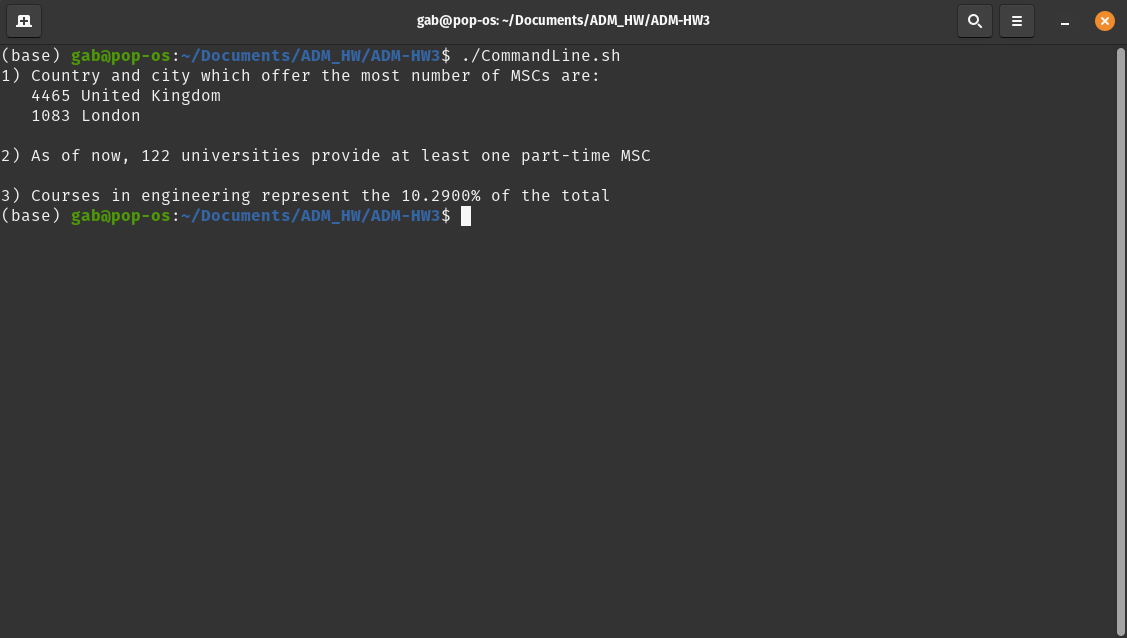

# **7. Algorithm Questions**


## 1. Implement a code to solve the above mentioned problem.

In [ ]:
def create_hours_report(num_days, total_hours, day_limits):
    min_total_hours = sum(min_hours for min_hours, _ in day_limits)
    max_total_hours = sum(max_hours for _, max_hours in day_limits)

    # Checking if the total hours fall within the limits
    if total_hours < min_total_hours or total_hours > max_total_hours:
        print("NO")
        return

    remaining_hours = total_hours
    hours_report = []

    # Pre-calculate min_total_hours and max_total_hours
    precalculated_min_total_hours = min_total_hours
    precalculated_max_total_hours = max_total_hours

    # Generating the report using greedy approach.

    for i, (min_hours, max_hours) in enumerate(day_limits[:-1]):

        # Calculating the allocated hours based on the remaining hours and limits
        allocated_hours = min(
            max(min_hours, remaining_hours // (num_days - i - 1)), max_hours
        )

        # Updating the remaining hours
        remaining_hours -= allocated_hours

        # Adding allocated hours to the report
        hours_report.append(allocated_hours)

    # Allocating the remaining hours to the last day
    hours_report.append(max(min_hours, remaining_hours))

    print("YES")
    print(*hours_report)


num_days = int(input())
total_hours = int(input())
day_limits = []

for i in range(num_days):
    min_hours, max_hours = map(int, input(f"Enter the minimum and maximum hours for day {i+1} separated by space: ").split())
    day_limits.append((min_hours, max_hours))

create_hours_report(num_days, total_hours, day_limits)


2
5
Enter the minimum and maximum hours for day 1 separated by space: 0 1
Enter the minimum and maximum hours for day 2 separated by space: 3 5
YES
1 4


## 2.  What is the time complexity (the Big O notation) of your solution? Please provide a detailed explanation of how you calculated the time complexity.


--->

* Calculating min_total_hours and max_total_hours: This takes O(n) time, as it involves iterating over the day_limits list and performing a constant-time operation (addition) for each element.

* Checking if total hours fall within limits: This takes O(1) time, as it simply involves comparing the total_hours to min_total_hours and max_total_hours.

* Generating the report: This takes O(n) time, as it involves iterating over the day_limits list and performing a constant-time operation (appending to the hours_report list) for each element.

## 3. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. Do you believe this is correct? If the two differ, which one is right? (why?)

--->

> **Prompt used :** "*Act as a alogirthm expert and calculate the time complexity of the following code.* "

>**Solution provided by the chatbot:**  Let's break down the key components of the algorithm:


*   Summing the minimum and maximum hours: The initial calculations of min_hours and max_hours involve summing the minimum and maximum hours from the day limits. This operation takes linear time, O(d), where d is the number of days.

*   Iterating over day_limits: The main loop iterates over the day_limits list, which has d elements. Inside the loop, the operations involve simple arithmetic and list append operations, all of which are constant time. Therefore, the loop has a time complexity of O(d).



Overall, the dominant factor in the time complexity is the summing of minimum and maximum hours and the iteration over the day limits, both contributing O(d) to the overall time complexity.

Therefore, the total time complexity of the solution is O(d). The solution scales linearly with the number of days worked.



> **Conclusion :** *The solution provided by the chatbot is same it has been calculated by us.*



## 4. What do you think of the optimality of your code? Do you believe it is optimal? Can you improve? Please elaborate on your response.


---> Certainly the code we used are not optimal interms of time complexity but the optimal solution can be using binary search which can reduce the time complexity to O(logn) or O(log(total_hours)).


Pseudocode:


function allocateHoursBinarySearch(numDays, totalHours, dayLimits):
    low = 0
    high = totalHours

    while low < high:
        mid = (low + high) // 2

        if canAllocateHours(mid, numDays, totalHours, dayLimits):
            high = mid
        else:
            low = mid + 1

    remainingHours = totalHours

    hoursReport = []

    for i = 0 to numDays - 2:
        minHours, maxHours = dayLimits[i]

        maxPossibleHours = min(maxHours, remainingHours - (numDays - i - 1) * minHours)
        allocatedHours = min(maxPossibleHours, remainingHours // (numDays - i - 1))
        hoursReport.append(allocatedHours)

        remainingHours -= allocatedHours

    hoursReport.append(remainingHours)

    if remainingHours >= 0:
        print("YES")
        print(hoursReport)
    else:
        print("NO")



The key operations affecting the time complexity are in the binary search loop and the subsequent loop iterating over the days.

Binary Search:
The binary search loop iterates until low is no longer less than high.
In each iteration, it performs constant-time operations, and the search space is halved.
The number of iterations in the binary search loop is proportional to the logarithm (base 2) of the totalHours.
Therefore, the time complexity of the binary search is O(log(totalHours)).
Loop Over Days:
The subsequent loop iterates over the days (numDays - 2 iterations).
In each iteration, it performs constant-time operations.
The overall time complexity of this loop is O(numDays).
Considering the dominant term, the overall time complexity of the provided pseudocode is O(log(totalHours) + numDays).



**Conslusion : ** The notation O(log(totalHours) + numDays) indicates that the algorithm's efficiency improves as the total number of hours increases (due to the logarithmic term), making it more efficient than a linear algorithm (O(n)) for large input sizes. In summary, the time complexity is more effective than O(n), and it scales better with larger input sizes due to the logarithmic term in the binary search loop.